In [92]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [93]:
census_data = pd.read_csv("./census_poverty.csv", dtype={'id': np.unicode_ , "Estimate!!Percent below poverty level!!Population for whom poverty status is determined": np.single})
#dtype=pd.StringDtype()

In [94]:
census_data.head()

,id,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined,Margin of Error!!Total MOE!!Population for whom poverty status is determined,Estimate!!Below poverty level!!Population for whom poverty status is determined,Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,Margin of Error!!Percent below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years,Margin of Error!!Total MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years,...,"Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months",Estimate!!Total!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Total MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",4207,478,679,281,16.1,6.4,849,187,...,85,61,44.7,25,300,95,178,74,59.3,14.4
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3234,326,109,61,3.4,2,393,197,...,21,32,31.3,40.6,143,56,54,43,37.8,22.3
2,6037101210,"Census Tract 1012.10, Los Angeles County, Cali...",6042,510,1994,577,33.0,9,1369,317,...,110,85,40,27.1,514,202,375,186,73,16.6
3,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3497,336,524,214,15.0,5.9,726,179,...,105,71,44.1,22.7,154,62,67,42,43.5,22.4
4,6037101300,"Census Tract 1013, Los Angeles County, California",4250,483,391,301,9.2,6.7,518,121,...,26,25,38.2,17.1,450,302,279,290,62,31.5


In [95]:
census_data = census_data.rename(columns= {'id': 'GEOID10'} , errors="raise")
#df.rename(columns={"A": "a", "B": "b", "C": "c"}, errors="raise")

In [96]:
#census_data["GEOID10"].dtype
#census_data.head()
census_data["Estimate!!Percent below poverty level!!Population for whom poverty status is determined"].dtype

dtype('float32')

In [97]:
census_data["GEOID10"] = "0"+ census_data["GEOID10"]
census_data.head()

,GEOID10,Geographic Area Name,Estimate!!Total!!Population for whom poverty status is determined,Margin of Error!!Total MOE!!Population for whom poverty status is determined,Estimate!!Below poverty level!!Population for whom poverty status is determined,Margin of Error!!Below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Percent below poverty level!!Population for whom poverty status is determined,Margin of Error!!Percent below poverty level MOE!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years,Margin of Error!!Total MOE!!Population for whom poverty status is determined!!AGE!!Under 18 years,...,"Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months","Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months",Estimate!!Total!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Total MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work,Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not work
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",4207,478,679,281,16.1,6.4,849,187,...,85,61,44.7,25,300,95,178,74,59.3,14.4
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",3234,326,109,61,3.4,2,393,197,...,21,32,31.3,40.6,143,56,54,43,37.8,22.3
2,06037101210,"Census Tract 1012.10, Los Angeles County, Cali...",6042,510,1994,577,33.0,9,1369,317,...,110,85,40,27.1,514,202,375,186,73,16.6
3,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",3497,336,524,214,15.0,5.9,726,179,...,105,71,44.1,22.7,154,62,67,42,43.5,22.4
4,06037101300,"Census Tract 1013, Los Angeles County, California",4250,483,391,301,9.2,6.7,518,121,...,26,25,38.2,17.1,450,302,279,290,62,31.5


In [98]:
census_tracts = gpd.read_file("./GISData/CENSUS_TRACTS_2010/CENSUS_TRACTS_2010.shp")

In [99]:
census_tracts.head()

,GEOID10,CT10,LABEL,X_Center,Y_Center,Shape_STAr,Shape_STLe,geometry
0,06037911001,911001,9110.01,6620403.0,1998891.0,4.025736e+09,353933.808192,"POLYGON ((6661890.013 2025618.301, 6661890.061..."
1,06037980003,980003,9800.03,6575300.0,2112006.0,2.078690e+09,273188.863210,"POLYGON ((6597523.249 2100300.409, 6596954.119..."
2,06037930301,930301,9303.01,6603027.0,1932124.0,1.111802e+10,628603.531323,"POLYGON ((6665669.120 1967117.056, 6665686.224..."
3,06037573003,573003,5730.03,6500215.0,1747305.0,4.824002e+06,9050.008458,"POLYGON ((6501132.579 1748610.392, 6501132.519..."
4,06037297602,297602,2976.02,6473372.0,1719119.0,6.697031e+06,12308.315385,"POLYGON ((6474090.420 1721548.560, 6474090.159..."


In [100]:
census_tracts["GEOID10"].dtype

dtype('O')

In [101]:
census_tracts_populated = census_tracts.merge(census_data, on='GEOID10')
#country_shapes = country_shapes.merge(country_names, on='iso_a3')

In [102]:
census_tracts_populated.columns

Index(['GEOID10', 'CT10', 'LABEL', 'X_Center', 'Y_Center', 'Shape_STAr',
       'Shape_STLe', 'geometry', 'Geographic Area Name',
       'Estimate!!Total!!Population for whom poverty status is determined',
       ...
       'Estimate!!Below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months',
       'Margin of Error!!Below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months',
       'Estimate!!Percent below poverty level!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months',
       'Margin of Error!!Percent below poverty level MOE!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Worked less than full-time, year-round in the past 12 months',
       'Estimate!!Total!!UNRELATED INDIVIDUALS FOR WHOM POVERTY STATUS IS DETERMINED!!Did not

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


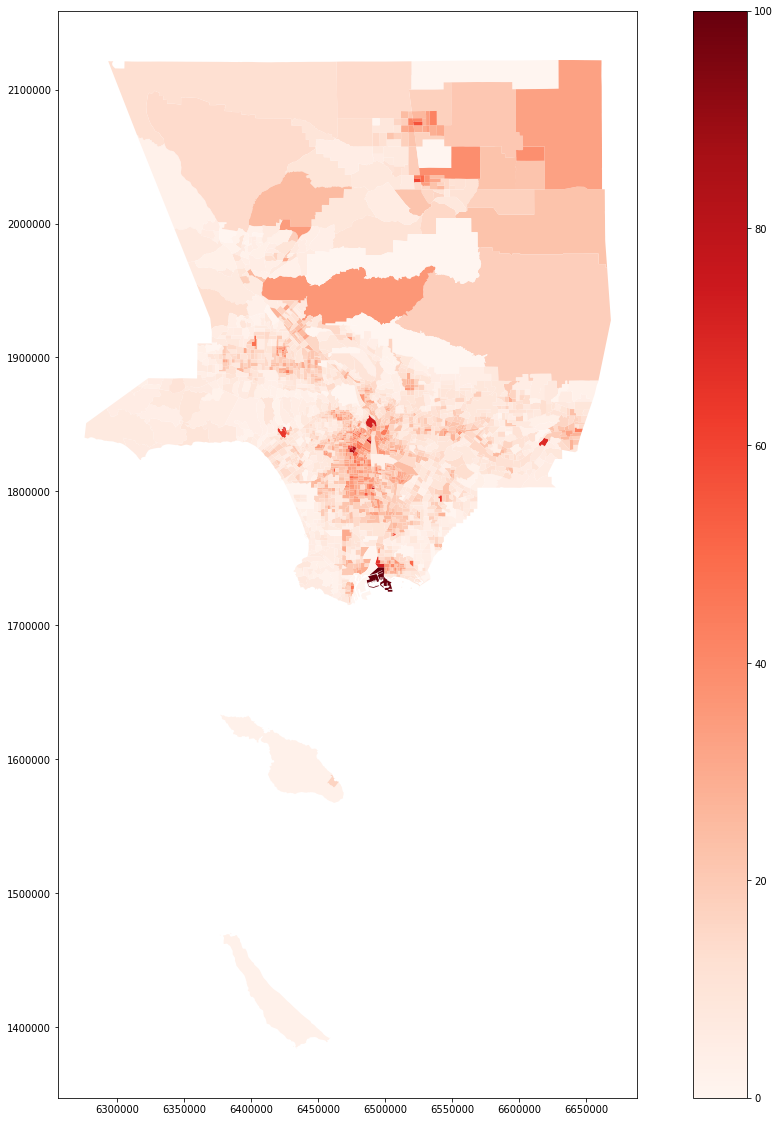

In [103]:
ax = census_tracts_populated.plot(figsize=(20, 20),column='Estimate!!Percent below poverty level!!Population for whom poverty status is determined', cmap="Reds", legend = True)